In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("US_Accidents_Dec21_updated.csv")

<ipython-input-3-27a5de8579e6>:1: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("US_Accidents_Dec21_updated.csv")


In [ ]:
df.shape

(124869, 47)

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df_severity = df.groupby('Severity')['ID'].count().sort_values(ascending = False)

In [ ]:

df_severity

Severity
2    87232
3    22734
4    14903
Name: ID, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124869 entries, 0 to 124868
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     124869 non-null  object 
 1   Severity               124869 non-null  int64  
 2   Start_Time             124869 non-null  object 
 3   End_Time               124869 non-null  object 
 4   Start_Lat              124869 non-null  float64
 5   Start_Lng              124869 non-null  float64
 6   End_Lat                124869 non-null  float64
 7   End_Lng                124869 non-null  float64
 8   Distance(mi)           124869 non-null  float64
 9   Description            124869 non-null  object 
 10  Number                 24476 non-null   float64
 11  Street                 124869 non-null  object 
 12  Side                   124869 non-null  object 
 13  City                   124852 non-null  object 
 14  County                 124869 non-nu

In [ ]:
df.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   100393
Street                        0
Side                          0
City                         17
County                        0
State                         0
Zipcode                      74
Country                       0
Timezone                     88
Airport_Code                202
Weather_Timestamp          1197
Temperature(F)             2760
Wind_Chill(F)            104802
Humidity(%)                2920
Pressure(in)               2167
Visibility(mi)             3173
Wind_Direction             1212
Wind_Speed(mph)           22277
Precipitation(in)        109715
Weather_Condition          3090
Amenity                       1
Bump    

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],format = '%Y-%m-%d %H:%M:%S')

In [ ]:
df['Start_Time'].dt.hour.head(10)

0     0
1     5
2     6
3     6
4     7
5     8
6     8
7    11
8    14
9    15
Name: Start_Time, dtype: int64

In [ ]:
# < 12 morning
# < 16 afternoon
#< 21 evening
# night

def phase_of_day(hour):
    if(hour < 12):
        return 'morning'
    elif(hour < 16):
        return 'afternoon'
    elif(hour<21):
        return 'evening'
    else:
        return 'night'

In [ ]:
df['phase_of_the_day'] = df['Start_Time'].dt.hour.apply(phase_of_day)

In [ ]:
df.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,phase_of_the_day
124864,A-124865,2,2016-08-02 17:33:21,2016-08-02 23:33:21,32.90226,-117.22383,32.91050,-117.22769,0.612,At I-805 Northern Split - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,evening
124865,A-124866,2,2016-08-02 17:38:25,2016-08-02 23:38:25,34.01891,-118.17390,34.01891,-118.17390,0.000,At 19 - Accident.,...,False,False,False,True,False,Day,Day,Day,Day,evening
124866,A-124867,2,2016-08-02 17:39:48,2016-08-02 23:39:48,33.88374,-117.63927,33.88453,-117.63113,0.470,At CA-71 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,evening
124867,A-124868,2,2016-08-02 17:56:06,2016-08-02 23:56:06,38.75401,-121.26412,38.76163,-121.25911,0.592,At Atlantic St/Eureka Rd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,evening
124868,A-124869,4,2016-08-02 17:58:48,2016-08-02 23:58:48,47.01247,-122.71667,47.01247,-122.71667,0.000,Closed at Reservation Rd SE - Road closed due ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,evening


In [ ]:
df['State'].unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [ ]:
df_texas = df.loc[df['State']=='TX',]
result = df_texas.groupby('phase_of_the_day')['ID'].count().sort_values(ascending=False)
result

phase_of_the_day
morning      5297
evening      2760
afternoon    2178
night         396
Name: ID, dtype: int64

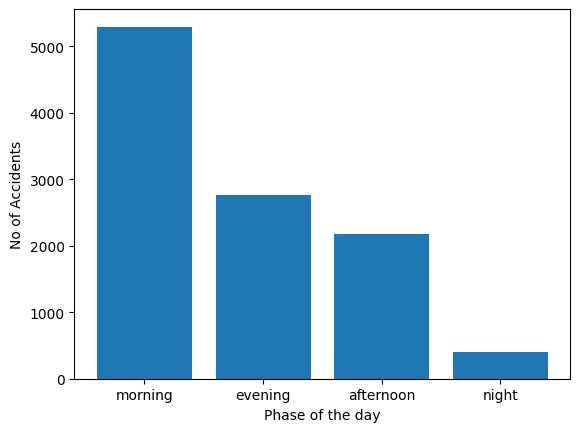

In [ ]:
plt.bar(result.index,result)
plt.xlabel("Phase of the day")
plt.ylabel("No of Accidents")
plt.show()

In [ ]:
temp = df.groupby(['State','phase_of_the_day'])


In [ ]:
temp.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,phase_of_the_day
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,Night,Night,Night,Night,morning
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,morning
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,Night,Night,Night,Day,morning
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,morning
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106047,A-106048,3,2016-12-12 23:11:46,2016-12-13 05:11:46,36.100410,-115.050210,36.101010,-115.050880,0.056,At E Tropicana Ave - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,night
106447,A-106448,4,2016-12-14 23:08:02,2016-12-15 05:08:02,45.552980,-122.678790,45.541000,-122.671960,0.891,Closed between Killingsworth St/Exit 303 and B...,...,False,False,False,False,False,Night,Night,Night,Night,night
107061,A-107062,2,2016-12-16 23:12:45,2016-12-17 05:12:45,47.483510,-122.270360,47.485190,-122.268490,0.145,At Interurban Ave/Exit 156 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,night
108247,A-108248,4,2016-12-26 21:53:42,2016-12-27 03:53:42,44.018192,-123.978759,43.982616,-124.050780,4.342,Closed between OR-36/Mapleton-Junction City Hw...,...,False,False,False,False,False,Night,Night,Night,Night,night


In [ ]:

df_hours_texas = df_texas.groupby(df['Start_Time'].dt.hour)

In [ ]:
df_accident_hours = df_hours_texas['ID'].count()

print(df_accident_hours)



Start_Time
0     102
1      95
2      93
3     146
4     249
5     349
6     801
7     949
8     794
9     675
10    510
11    534
12    406
13    490
14    574
15    708
16    726
17    747
18    646
19    446
20    195
21    147
22    122
23    127
Name: ID, dtype: int64


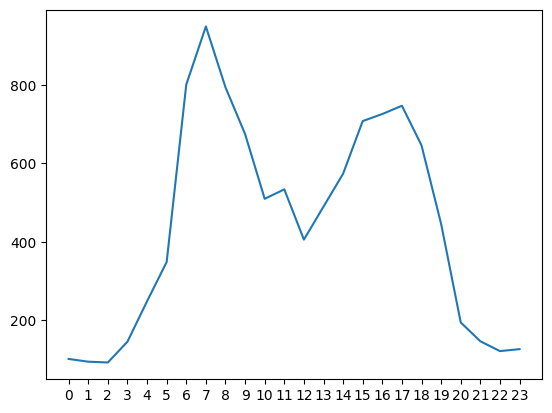

In [ ]:
plt.plot(df_accident_hours.index,df_accident_hours)
plt.xticks(df_accident_hours.index)
plt.show()

In [ ]:
df_texas['Day'] = df_texas['Start_Time'].dt.day_name()

<ipython-input-23-a943828c6d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Day'] = df_texas['Start_Time'].dt.day_name()


In [ ]:
df_texas.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,phase_of_the_day,Day
11785,A-11786,2,2016-11-30 15:29:48,2016-11-30 21:29:48,32.84365,-96.77463,32.81833,-96.78806,1.915,Between Mockingbird Ln/Exit 3 and Knox St/Hend...,...,False,False,False,False,Day,Day,Day,Day,afternoon,Wednesday
11786,A-11787,2,2016-11-30 15:41:16,2016-11-30 21:41:16,32.84662,-96.63736,32.84640,-96.63711,0.021,At La Prada Dr/Exit 9 - Accident.,...,False,False,False,False,Day,Day,Day,Day,afternoon,Wednesday
11787,A-11788,3,2016-11-30 15:15:48,2016-11-30 21:15:48,32.86693,-96.66617,32.86156,-96.65769,0.616,At Northwest Hwy/Exit 11 - Accident.,...,False,False,False,False,Day,Day,Day,Day,afternoon,Wednesday
11790,A-11791,2,2016-11-30 15:35:51,2016-11-30 21:35:51,32.79426,-97.21214,32.80106,-97.21195,0.470,At Trinity Blvd/Exit 25 - Accident.,...,False,False,False,False,Day,Day,Day,Day,afternoon,Wednesday
11792,A-11793,2,2016-11-30 16:16:05,2016-11-30 22:16:05,32.81235,-97.31399,32.82511,-97.31258,0.885,At Meacham Blvd/Exit 56 - Accident.,...,False,False,False,False,Day,Day,Day,Day,evening,Wednesday


In [ ]:
def IsWeekend(day):
    if day in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
        return 'weekday'
    else:
        return 'weekend'

In [ ]:
df_texas['Day']  = df_texas['Day'].apply(IsWeekend)

<ipython-input-26-7e2de60f86d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Day']  = df_texas['Day'].apply(IsWeekend)


In [ ]:
df_texas.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,phase_of_the_day,Day
11785,A-11786,2,2016-11-30 15:29:48,2016-11-30 21:29:48,32.84365,-96.77463,32.81833,-96.78806,1.915,Between Mockingbird Ln/Exit 3 and Knox St/Hend...,...,False,False,False,False,Day,Day,Day,Day,afternoon,weekday
11786,A-11787,2,2016-11-30 15:41:16,2016-11-30 21:41:16,32.84662,-96.63736,32.84640,-96.63711,0.021,At La Prada Dr/Exit 9 - Accident.,...,False,False,False,False,Day,Day,Day,Day,afternoon,weekday
11787,A-11788,3,2016-11-30 15:15:48,2016-11-30 21:15:48,32.86693,-96.66617,32.86156,-96.65769,0.616,At Northwest Hwy/Exit 11 - Accident.,...,False,False,False,False,Day,Day,Day,Day,afternoon,weekday
11790,A-11791,2,2016-11-30 15:35:51,2016-11-30 21:35:51,32.79426,-97.21214,32.80106,-97.21195,0.470,At Trinity Blvd/Exit 25 - Accident.,...,False,False,False,False,Day,Day,Day,Day,afternoon,weekday
11792,A-11793,2,2016-11-30 16:16:05,2016-11-30 22:16:05,32.81235,-97.31399,32.82511,-97.31258,0.885,At Meacham Blvd/Exit 56 - Accident.,...,False,False,False,False,Day,Day,Day,Day,evening,weekday


In [ ]:
df_texas_weekday = df_texas.loc[df_texas['Day'] == 'weekday',:]
df_texas_weekend = df_texas.loc[df_texas['Day'] == 'weekend',:]

In [ ]:
df_texas_weekday_hour = df_texas_weekday.groupby(df_texas_weekday['Start_Time'].dt.hour)['ID'].count()
df_texas_weekend_hour = df_texas_weekend.groupby(df_texas_weekend['Start_Time'].dt.hour)['ID'].count()


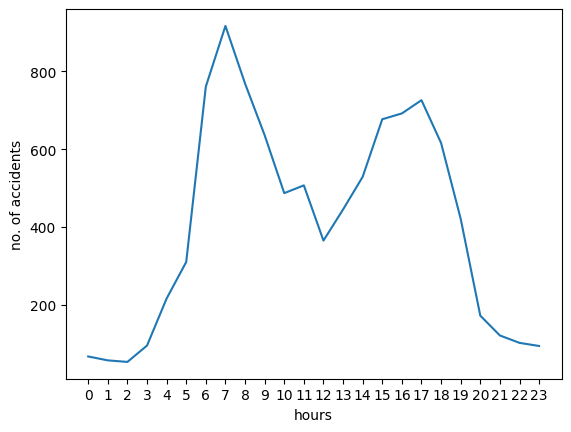

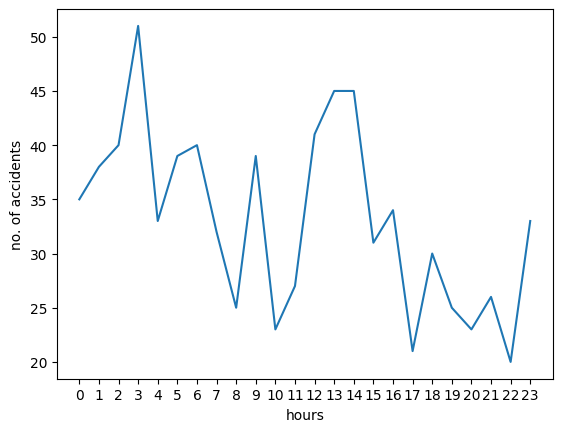

In [ ]:
plt.plot(df_texas_weekday_hour.index,df_texas_weekday_hour)
plt.xticks(df_texas_weekday_hour.index)
plt.xlabel('hours')
plt.ylabel('no. of accidents')
plt.show()

plt.plot(df_texas_weekend_hour.index,df_texas_weekend_hour)
plt.xticks(df_texas_weekend_hour.index)
plt.xlabel('hours')
plt.ylabel('no. of accidents')
plt.show()



In [ ]:
df.dropna(subset=['Weather_Condition'], how = 'any' , inplace= True)

In [ ]:
df['Weather_Condition'].unique()
# for which weather conditions do maximum accidents occur


array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Light Rai

In [ ]:
df['Weather_Condition'].value_counts().sort_values(ascending = False)

Clear                           43682
Overcast                        20199
Mostly Cloudy                   18536
Scattered Clouds                13041
Partly Cloudy                   12314
Light Rain                       5645
Light Snow                       1681
Rain                             1392
Haze                             1105
Fair                              638
Fog                               568
Heavy Rain                        465
Light Thunderstorms and Rain      352
Light Drizzle                     326
Thunderstorm                      298
Cloudy                            229
Snow                              198
Heavy Thunderstorms and Rain      156
Thunderstorms and Rain            148
Light Freezing Rain               146
Smoke                              96
Mist                               83
Drizzle                            80
Light Freezing Drizzle             67
Patches of Fog                     66
Light Freezing Fog                 50
Shallow Fog 

In [ ]:
def Conditions(weather):
    weather = weather.strip().lower()
    if 'rain' in weather:
        return 'rainy'
    elif 'cloud' in weather:
        return 'cloudy'
    elif 'wind' in weather:
        return 'windy'
    elif 'fog' in weather:
        return 'foggy'
    elif 'snow' in weather:
        return 'snowy'
    else:
        return 'clear'


In [ ]:
df['Weather_Condition'] = df['Weather_Condition'].apply(Conditions)
accidents_by_weather  = df.groupby('Weather_Condition')['ID'].count()
print(accidents_by_weather)

Weather_Condition
clear     66652
cloudy    44131
foggy       725
rainy      8337
snowy      1926
windy         8
Name: ID, dtype: int64


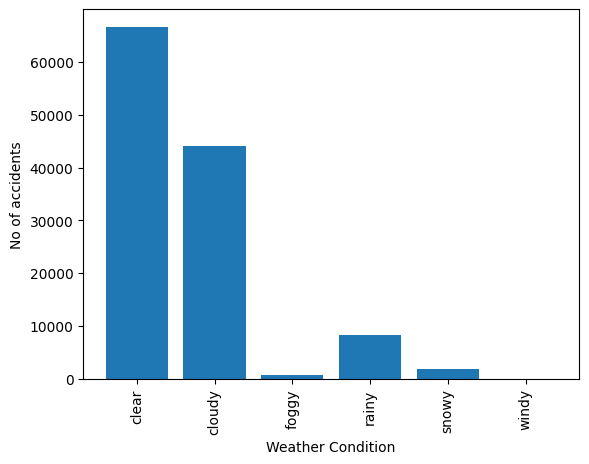

In [ ]:
plt.bar(accidents_by_weather.index,accidents_by_weather)
plt.xticks(accidents_by_weather.index,rotation='vertical')
plt.xlabel('Weather Condition')
plt.ylabel('No of accidents')
plt.show()

In [ ]:
# Are there more accidents in warmer and colder areas ?
# Which 5 states have the  highest number of accidentss ? How about per capita ?
# Among the top 100 cities in number of accidents, which states do they belong to the most frequently?
# which days of the week have the most accidents?
# what is  the trend of accidents year over year

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'phase_of_the_day'],
      dtype='object')

In [ ]:
df['Temperature(F)'].describe()

count    121085.000000
mean         62.960391
std          18.904452
min         -18.000000
25%          51.800000
50%          64.900000
75%          77.000000
max         129.200000
Name: Temperature(F), dtype: float64

In [ ]:
def warm_or_cold(temprature):
    if(temprature <50):
        return 'cold'
    else:
        return 'warm'

In [ ]:
df['Area_type'] = df['Temperature(F)'].apply(warm_or_cold)

In [ ]:
df.loc[:,['Area_type','Temperature(F)']]

,Area_type,Temperature(F)
0,cold,42.1
1,cold,36.9
2,cold,36.0
3,cold,39.0
4,cold,37.0
...,...,...
124864,warm,77.0
124865,warm,77.0
124866,warm,86.0
124867,warm,93.2


In [ ]:
accidents_by_area_type = df.groupby('Area_type')['ID'].count()
accidents_by_area_type

Area_type
cold    26717
warm    95062
Name: ID, dtype: int64

Text(0, 0.5, 'accidents in lakhs')

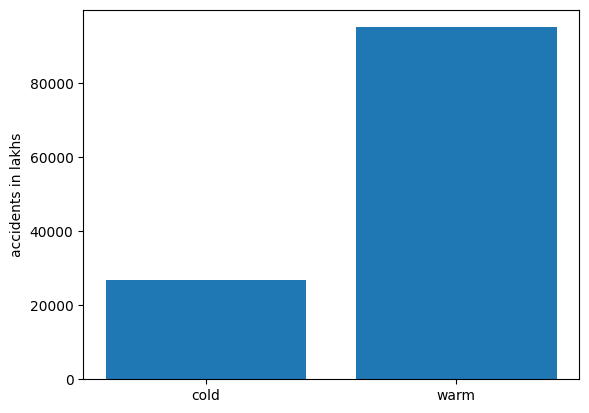

In [ ]:
plt.bar(accidents_by_area_type.index,accidents_by_area_type)
plt.ylabel('accidents in lakhs')

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'phase_of_the_day', 'Area_type'],
      dtype='object')

In [ ]:
df.loc[:, 'State']

0         OH
1         OH
2         OH
3         OH
4         OH
          ..
124864    CA
124865    CA
124866    CA
124867    CA
124868    WA
Name: State, Length: 121779, dtype: object

In [ ]:
df['State'].unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [ ]:
df_states = df.groupby('State')['ID'].count().sort_values(ascending = False).head(5)

In [ ]:
df_states

State
CA    27850
TX    10337
FL     9694
IL     7487
NY     7331
Name: ID, dtype: int64

Text(0, 0.5, 'No of accidents')

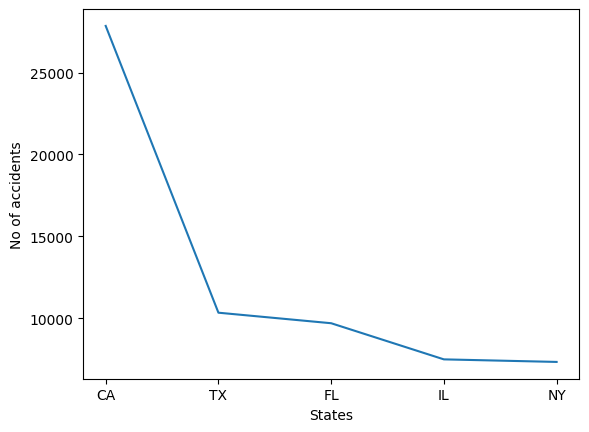

In [ ]:
plt.plot(df_states.index,df_states)
plt.xticks(df_states.index)
plt.xlabel('States')
plt.ylabel('No of accidents')

In [ ]:
df['city_state'] = df['City']+','+df['State']

In [ ]:
df.loc[:,['city_state','City','State']]

,city_state,City,State
0,"Dublin,OH",Dublin,OH
1,"Dayton,OH",Dayton,OH
2,"Cincinnati,OH",Cincinnati,OH
3,"Akron,OH",Akron,OH
4,"Cincinnati,OH",Cincinnati,OH
...,...,...,...
124864,"San Diego,CA",San Diego,CA
124865,"Los Angeles,CA",Los Angeles,CA
124866,"Corona,CA",Corona,CA
124867,"Roseville,CA",Roseville,CA


In [ ]:
df_cities = df.groupby('city_state')['ID','State']
print(df_cities)


<ipython-input-53-c26fb3c03edd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cities = df.groupby('city_state')['ID','State']


In [ ]:
df_accident_by_days = df.groupby(df['Start_Time'].dt.day_name())['ID'].count()

Text(0, 0.5, 'No of Accidents')

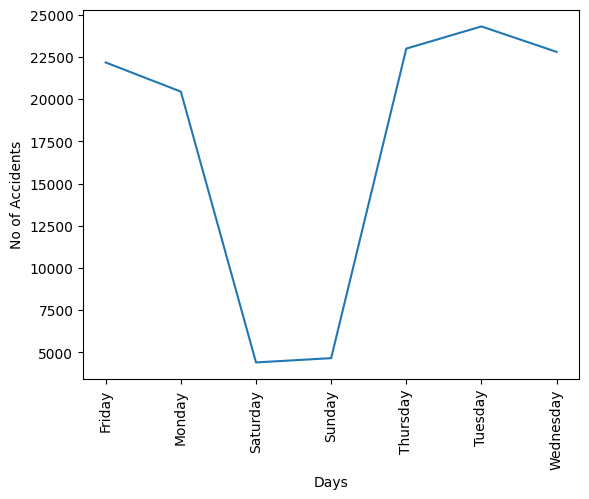

In [ ]:
plt.plot(df_accident_by_days.index,df_accident_by_days)
plt.xticks(df_accident_by_days.index,rotation='vertical')
plt.xlabel('Days')
plt.ylabel('No of Accidents')

In [ ]:
df_accident_by_year = df.groupby(df['Start_Time'].dt.year)['ID'].count()

In [ ]:
print(df_accident_by_year)

Start_Time
2016    108678
2017     13101
Name: ID, dtype: int64


Text(0, 0.5, 'No of accidents in million')

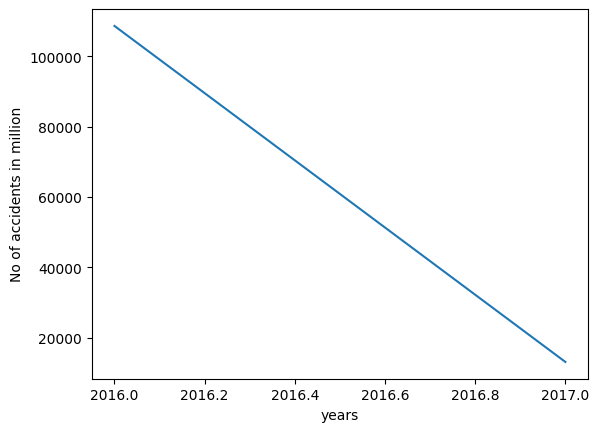

In [ ]:
plt.plot(df_accident_by_year.index,df_accident_by_year)
plt.xlabel('years')
plt.ylabel('No of accidents in million')